# Imports

In [46]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


from seaborn import load_dataset

from env import get_db_url

1. Clustering with the Iris Dataset

- Using this lesson as a guide, perform clustering on the iris dataset.

In [2]:
iris = load_dataset('iris')

a. Choose features other than the ones used in the lesson.

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = iris[["sepal_width", "petal_width"]]

In [5]:
kmeans = KMeans(3)
kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
iris["cluster_width"] = kmeans.predict(X)

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_width
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


b. Visualize the results of your clustering.

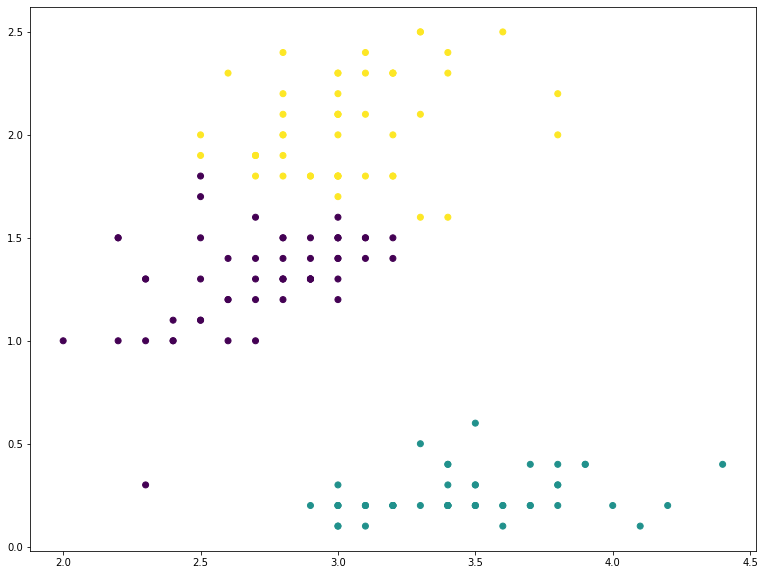

In [8]:
plt.figure(figsize=(13,10))
plt.scatter(iris.sepal_width, iris.petal_width, c= iris.cluster_width)

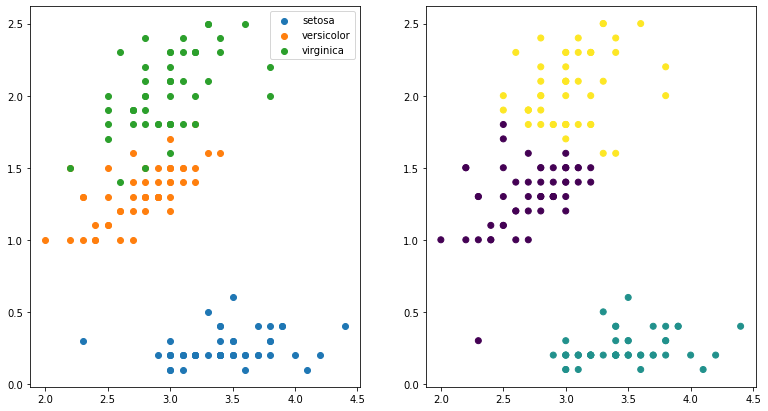

In [9]:
plt.figure(figsize=(13, 7))
plt.subplot(121)
for species, subset in iris.groupby('species'):
    plt.scatter(subset.sepal_width, subset.petal_width, label=species)
plt.legend()
plt.subplot(122)
plt.scatter(iris.sepal_width, iris.petal_width, c=iris.cluster_width)

c. Use the elbow method to visually select a good value for k.

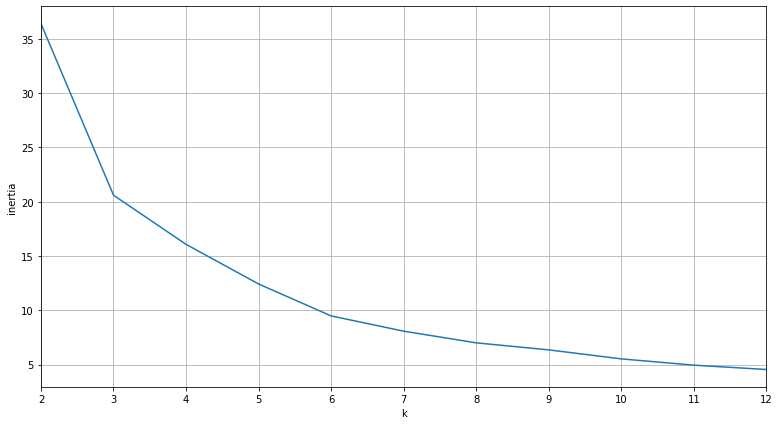

In [10]:
def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()

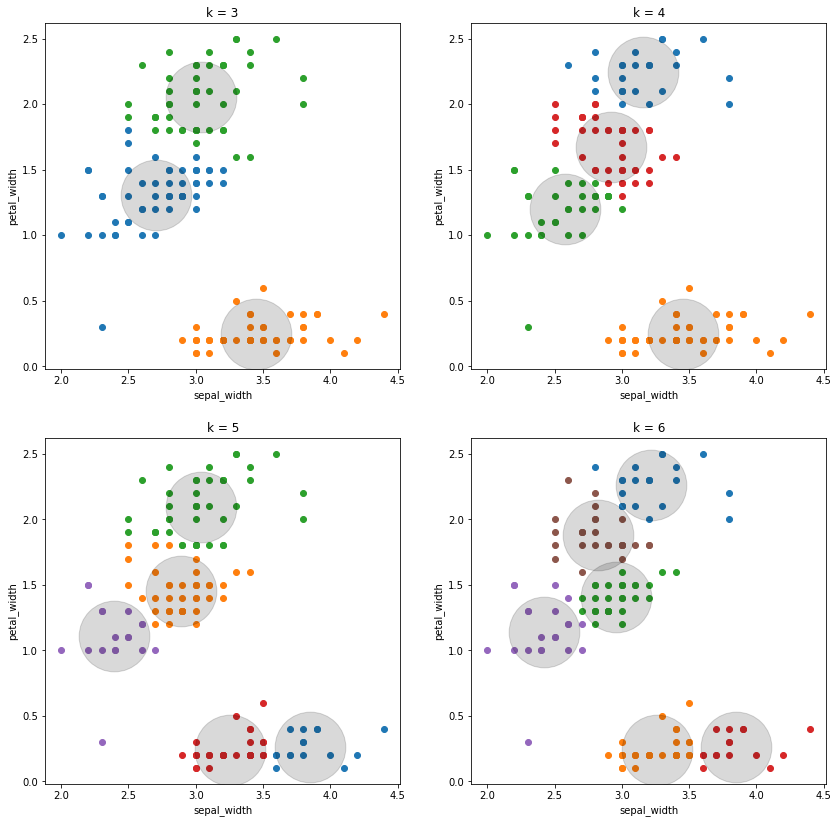

In [11]:

plt.figure(figsize=(14, 14))
for i, k in enumerate([3, 4, 5, 6]):
    plt.subplot(2, 2, i + 1)
    kmeans = KMeans(k)
    kmeans.fit(X)
    iris['cluster'] = kmeans.predict(X)
    iris.cluster = 'cluster ' + iris.cluster.astype(str)
    for cluster, subset in iris.groupby('cluster'):
        plt.scatter(subset.sepal_width, subset.petal_width, label=cluster)

    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    centroids.plot.scatter(x='sepal_width', y='petal_width', ax=plt.gca(), alpha=.15, s=5000, c='black')
    plt.title(f'k = {k}')

d. Repeat the clustering, this time with 3 different features.

In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
sepal_length     150 non-null float64
sepal_width      150 non-null float64
petal_length     150 non-null float64
petal_width      150 non-null float64
species          150 non-null object
cluster_width    150 non-null int32
cluster          150 non-null object
dtypes: float64(4), int32(1), object(2)
memory usage: 7.7+ KB


In [13]:
iris["sepal_area"] = iris.sepal_length * iris.sepal_width

In [14]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_width,cluster,sepal_area
0,5.1,3.5,1.4,0.2,setosa,1,cluster 1,17.85
1,4.9,3.0,1.4,0.2,setosa,1,cluster 1,14.70
2,4.7,3.2,1.3,0.2,setosa,1,cluster 1,15.04
3,4.6,3.1,1.5,0.2,setosa,1,cluster 1,14.26
4,5.0,3.6,1.4,0.2,setosa,1,cluster 3,18.00
...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,cluster 0,20.10
146,6.3,2.5,5.0,1.9,virginica,2,cluster 5,15.75
147,6.5,3.0,5.2,2.0,virginica,2,cluster 5,19.50
148,6.2,3.4,5.4,2.3,virginica,2,cluster 0,21.08


In [15]:
X = iris[["sepal_length", "petal_length", "petal_width"]]

In [16]:
kmeans = KMeans(3)
kmeans.fit(X)
kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [17]:
iris['cluster_with_3'] = kmeans.predict(X)

In [18]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_width,cluster,sepal_area,cluster_with_3
0,5.1,3.5,1.4,0.2,setosa,1,cluster 1,17.85,0
1,4.9,3.0,1.4,0.2,setosa,1,cluster 1,14.70,0
2,4.7,3.2,1.3,0.2,setosa,1,cluster 1,15.04,0
3,4.6,3.1,1.5,0.2,setosa,1,cluster 1,14.26,0
4,5.0,3.6,1.4,0.2,setosa,1,cluster 3,18.00,0


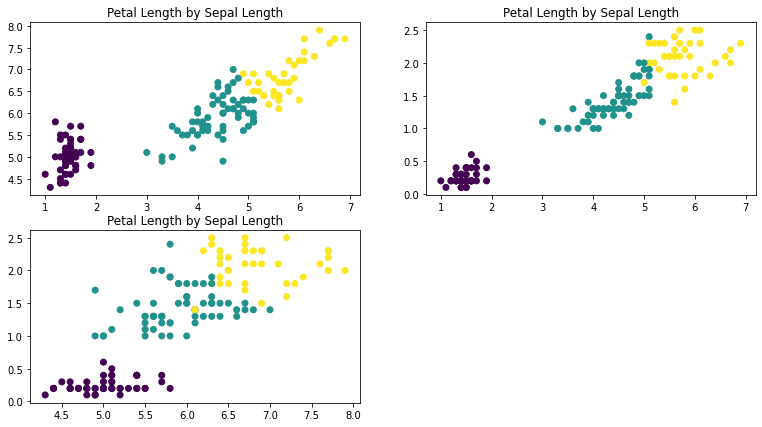

In [19]:
plt.figure(figsize=(13, 7))
plt.subplot(221)
plt.title("Petal Length by Sepal Length")
plt.scatter(iris.petal_length, iris.sepal_length, c=iris.cluster_with_3)

plt.subplot(222)
plt.title("Petal Length by Sepal Length")
plt.scatter(iris.petal_length, iris.petal_width, c=iris.cluster_with_3)

plt.subplot(223)
plt.title("Petal Length by Sepal Length")
plt.scatter(iris.sepal_length, iris.petal_width, c=iris.cluster_with_3)

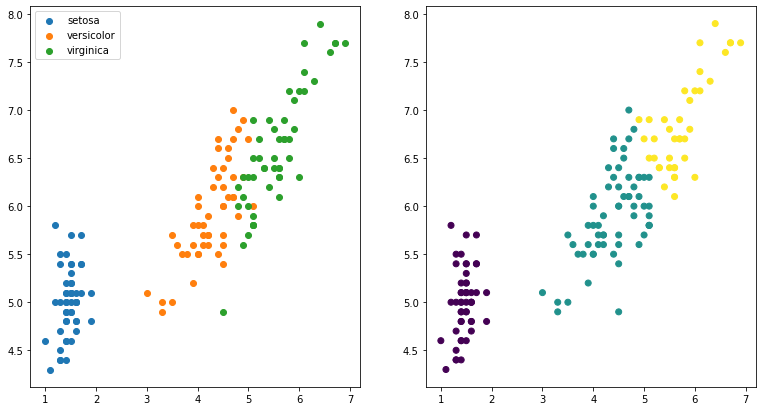

In [20]:

plt.figure(figsize=(13, 7))
plt.subplot(121)
for species, subset in iris.groupby('species'):
    plt.scatter(subset.petal_length, subset.sepal_length, label=species)
plt.legend()
plt.subplot(122)
plt.scatter(iris.petal_length, iris.sepal_length, c=iris.cluster_with_3)

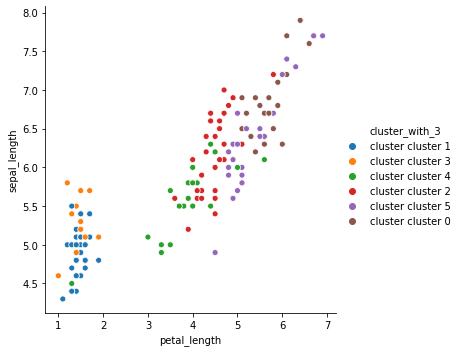

In [21]:
iris.cluster_with_3 = 'cluster ' + iris.cluster.astype(str)

sns.relplot(data=iris, y='sepal_length', x='petal_length', hue='cluster_with_3')

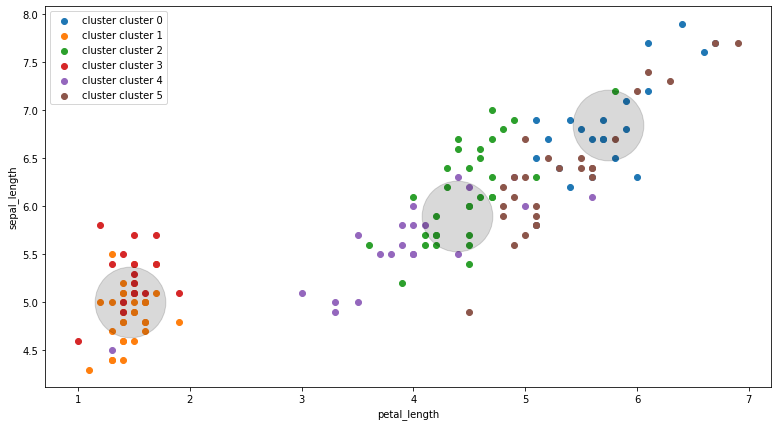

In [22]:
plt.figure(figsize=(13, 7))
for cluster, subset in iris.groupby('cluster_with_3'):
    plt.scatter(subset.petal_length, subset.sepal_length, label=cluster)
    
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
# Xs to indicate cluster centers
# centroids.plot.scatter(y='sepal_length', x='petal_length', ax=plt.gca(), marker='x', s=1000, c='black')
centroids.plot.scatter(y='sepal_length', x='petal_length', ax=plt.gca(), alpha=.15, s=5000, c='black')
plt.legend()

2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [23]:
url = get_db_url("mall_customers")

In [24]:
sql = "SELECT * FROM customers;"

In [25]:
df = pd.read_sql(sql, url)

In [26]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
X = df[["annual_income", "spending_score"]]

In [36]:
kmeans = KMeans(3)
kmeans.fit(X)
df["cluster"] = kmeans.predict(X)

In [37]:
df.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


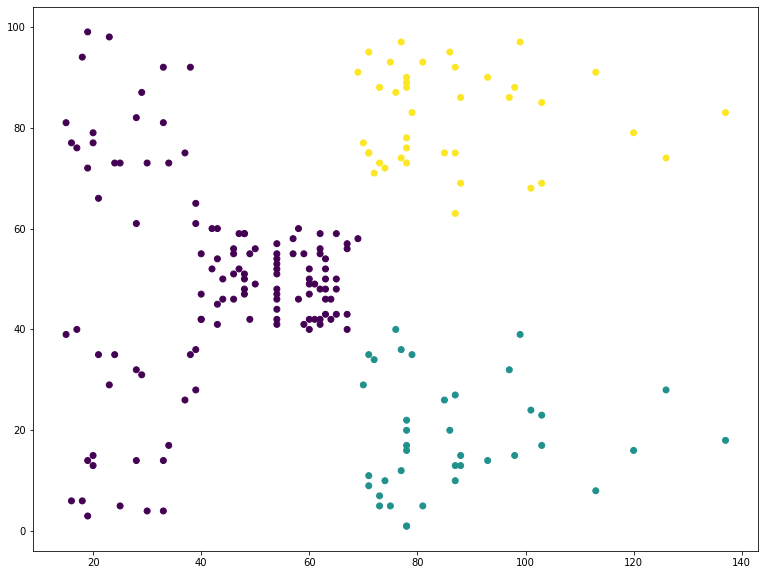

In [38]:
plt.figure(figsize=(13,10))
plt.scatter(df.annual_income, df.spending_score, c = df.cluster)

3. How does scaling impact the results of clustering?

- Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [40]:
df.cluster = "cluster " + df.cluster.astype(str)

In [43]:
df.customer_id = df.customer_id.astype(str)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
customer_id       200 non-null object
gender            200 non-null object
age               200 non-null int64
annual_income     200 non-null int64
spending_score    200 non-null int64
cluster           200 non-null object
dtypes: int64(3), object(3)
memory usage: 9.5+ KB


In [48]:
scaler = MinMaxScaler()
numeric_columns = list(df.select_dtypes('number').columns)

In [49]:
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [50]:
df.head()

,customer_id,gender,age,annual_income,spending_score,cluster
0,1,Male,0.019231,0.000000,0.387755,cluster 0
1,2,Male,0.057692,0.000000,0.816327,cluster 0
2,3,Female,0.038462,0.008197,0.051020,cluster 0
3,4,Female,0.096154,0.008197,0.775510,cluster 0
4,5,Female,0.250000,0.016393,0.397959,cluster 0


In [52]:
X = df[["annual_income", "spending_score"]]
kmeans = KMeans(3)
kmeans.fit(X)
df["cluster"] = kmeans.predict(X)

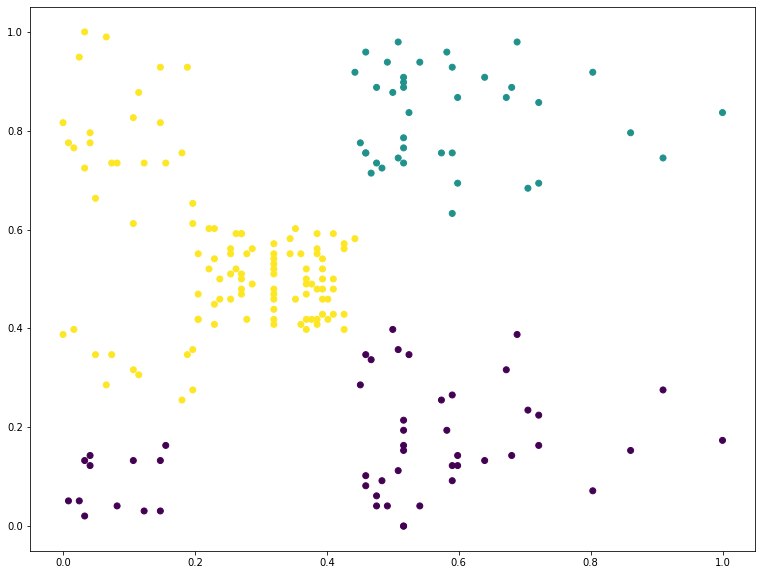

In [53]:
plt.figure(figsize=(13,10))
plt.scatter(df.annual_income, df.spending_score, c = df.cluster)